In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

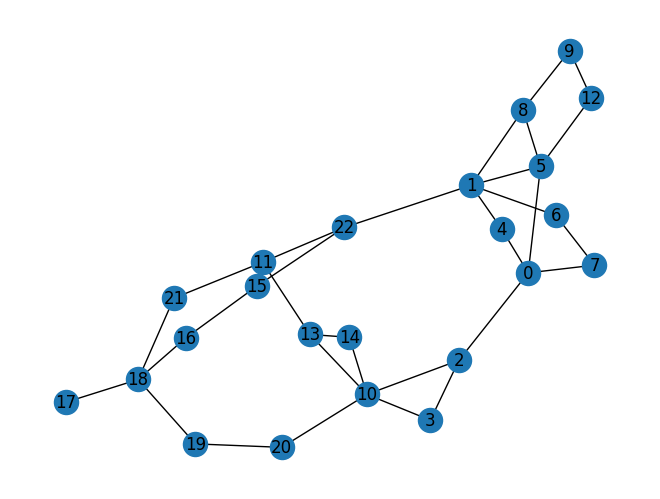

In [39]:
graph_1 = nx.read_graphml('graphml_ds/Abvt.graphml')
nx.draw(graph_1, with_labels=True)

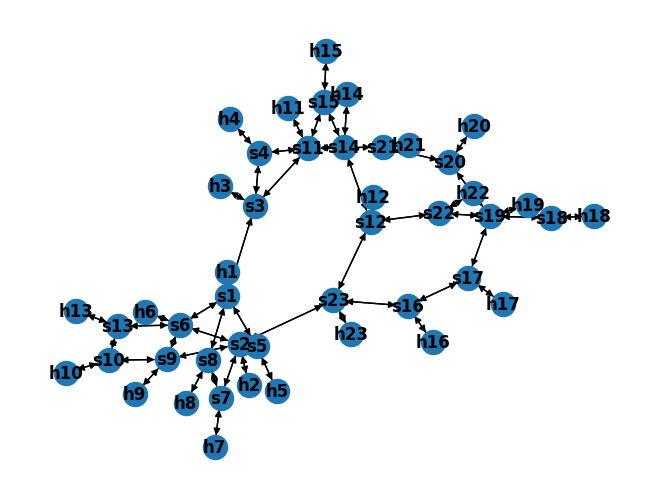

In [40]:
import networkx as nx
import requests as rq
import matplotlib.pyplot as plt

graph_2 = nx.json_graph.node_link_graph(rq.get('http://0.0.0.0:8000/graph').json())
nx.draw(graph_2, with_labels=True, font_weight='bold')
plt.show()


In [43]:
list(graph_2.neighbors('s2'))

['h2', 's9', 's23', 's5', 's6', 's7']

In [42]:
list(graph_1.neighbors('1'))

['8', '22', '4', '5', '6']